# 1. 使用X_test預測 算出mse

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
from sklearn.model_selection import train_test_split
X = df.drop("sales", axis = 1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [6]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model, X_train, y_train, cv = 5, scoring="neg_mean_squared_error")
print(score)
print(abs(score.mean()))

[-4.19295353 -1.50064402 -2.10907967 -2.54135514 -4.37293066]
2.943392602590042


In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

MSE: 3.1740973539761037


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
model = LinearRegression()
scroe = cross_validate(model, X_train, y_train, scoring = ["neg_mean_squared_error","neg_mean_absolute_error"], cv = 5)
print(scroe)
print(abs(scroe["test_neg_mean_squared_error"].mean()))
print(abs(scroe["test_neg_mean_absolute_error"].mean()))

{'fit_time': array([0.00099993, 0.00099993, 0.00099993, 0.00199866, 0.00200009]), 'score_time': array([0.00199795, 0.0019989 , 0.0009985 , 0.00099945, 0.00099921]), 'test_neg_mean_squared_error': array([-4.19295353, -1.50064402, -2.10907967, -2.54135514, -4.37293066]), 'test_neg_mean_absolute_error': array([-1.53634045, -0.93768604, -1.15598036, -1.29995295, -1.29630619])}
2.943392602590042
1.2452531983037354


# 2. 讀取訓練資料練習

In [9]:
mydf = pd.read_csv("./california_housing.csv")
mydf.head()
x = mydf.drop("Target", axis = 1)
y = mydf["Target"]
x.head(), y.head()

(   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
 1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
 2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
 3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
 4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
 
    Longitude  
 0    -122.23  
 1    -122.22  
 2    -122.24  
 3    -122.25  
 4    -122.25  ,
 0    4.526
 1    3.585
 2    3.521
 3    3.413
 4    3.422
 Name: Target, dtype: float64)

# 3. 網格搜索 (Grid Search)

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv("./Advertising.csv")
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
x = df.drop("sales", axis = 1)
y = df["sales"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 4. ElasticNet

In [14]:
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()

In [15]:
param_grid = {
    "alpha":[0.1,1,5,10,50,100],
    "l1_ratio":[0.1,0.5,0.7,0.9,0.95,0.99,1]
}

In [16]:
from sklearn.model_selection import GridSearchCV
grid_model = GridSearchCV(elastic, param_grid, cv = 5, scoring="neg_mean_squared_error", verbose = 2)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.1; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.5; total time=   0.0s
[CV] END ............................alpha=0.1, l1_ratio=0.7; total time=   0.0s
[CV] END ............................alpha=0.1,

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=2)

In [17]:
grid_model.best_params_

{'alpha': 0.1, 'l1_ratio': 1}

In [18]:
y_pred = grid_model.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print("MSE", mse)

MSE 2.3873426420874737


# 5. 混淆矩陣 (Confusion Matrix)

$ 假設有8筆資料[0, 0, 0, 1, 1, 1, 1, 1] $
$ 模型預測結果為[0, 1, 0, 1, 0, 1, 0, 1] $
$ 請先以人工計算混淆矩陣，再撰寫程式計算/繪製混淆矩陣。 $

In [19]:
y_true = [0,0,0,1,1,1,1,1]
y_pred = [0,1,0,1,0,1,0,1]
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[2, 1],
       [2, 3]], dtype=int64)

In [20]:
confusion_matrix(y_true, y_pred, labels = [1,0])

array([[3, 2],
       [1, 2]], dtype=int64)

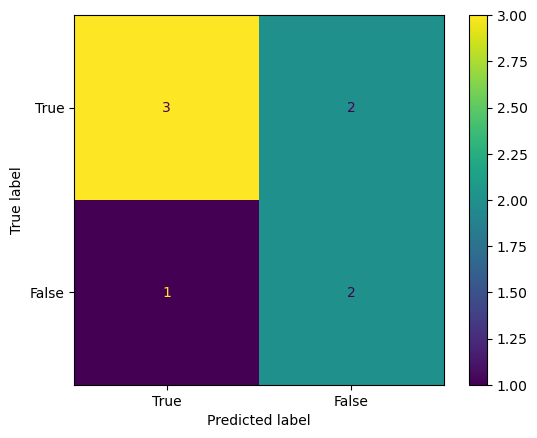

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, labels = [1,0], display_labels = ["True","False"])